### 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np

In [2]:
# 숫자 컬럼 생성 라이브러리
from sklearn.preprocessing import LabelEncoder

# 모델 라이브러리
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

# 모델 컴파일 라이브러리
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

# 훈련/테스트 데이터 자동 분리
from sklearn.model_selection import train_test_split

In [3]:
# ##### 일반 CPU 활용 방법
# from tensorflow import keras
# from tensorflow.keras import layers

##### Cuda GPU 활용 방법

In [4]:
import tensorflow as tf
from tensorflow.python.client import device_lib

# 장치 목록 확인
print(device_lib.list_local_devices())

import os
### -1 적용시 cpu 모드 작동
os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# cuda gpu 적용
from tensorflow import keras
from tensorflow.keras.datasets import mnist

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 10626536852814759927
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 5744099328
locality {
  bus_id: 1
  links {
  }
}
incarnation: 11849789007247707274
physical_device_desc: "device: 0, name: NVIDIA GeForce RTX 3070 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6"
]


In [5]:
# ##### Intel GPU 활용 방법 (PLAID ML)
# import os

# # intel gpu 적용
# os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"
# import keras
# # mnist 데이터셋
# from keras.datasets import mnist

In [6]:
# ##### gpu / cpu 전환

# # gpu 적용 시
# # gpu enable
# physical_devices = tf.config.list_physical_devices("GPU")
# tf.config.set_visible_devices(physical_devices[:], "GPU")

# # cpu 적용 시 (gpu 미적용)
# # # gpu disable
# # tf.config.experimental.set_visible_devices([],"GPU")
# tf.config.set_visible_devices([],"GPU")

### 데이터 불러오기

In [7]:
featuresData = pd.read_csv("../dataset/feature_regression_example.csv")
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155
...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361


### 1. 타입 통합 / 특성 숫자 컬럼 추가

#### 1-1. 타입 통합

In [8]:
featuresData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   REGIONID      105 non-null    object 
 1   PRODUCTGROUP  105 non-null    object 
 2   PRODUCT       105 non-null    object 
 3   ITEM          105 non-null    object 
 4   YEARWEEK      105 non-null    int64  
 5   YEAR          105 non-null    int64  
 6   WEEK          105 non-null    int64  
 7   QTY           105 non-null    int64  
 8   HOLIDAY       105 non-null    object 
 9   HCLUS         105 non-null    int64  
 10  PROMOTION     105 non-null    object 
 11  PRO_PERCENT   105 non-null    float64
dtypes: float64(1), int64(5), object(6)
memory usage: 10.0+ KB


#### 1-2. 특성 숫자 컬럼 추가

In [9]:
# 데이터 정렬
sortKey = ["REGIONID", "PRODUCTGROUP", "PRODUCT", "ITEM", "YEARWEEK"]

In [10]:
featuresData.sort_values(sortKey, inplace=True)

In [11]:
# 숫자형 컬럼 생성

In [12]:
le_yn = LabelEncoder()

In [13]:
featuresData["LE_PROMO"] = le_yn.fit_transform(featuresData.PROMOTION)
featuresData["LE_HOLI"] = le_yn.fit_transform(featuresData.HOLIDAY)

In [14]:
featuresData

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_PROMO,LE_HOLI
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,1,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201648,2016,48,2412,Y,0,Y,0.421888,1,1
101,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201649,2016,49,1955,N,4,Y,0.421888,1,0
102,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201650,2016,50,1800,N,4,Y,0.352361,1,0
103,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201651,2016,51,1173,N,4,Y,0.352361,1,0


### 2. 특성 선정 / 데이터 분리

#### 2-1. 특성 선정

In [15]:
featuresData.corr()

,YEARWEEK,YEAR,WEEK,QTY,HCLUS,PRO_PERCENT,LE_PROMO,LE_HOLI
YEARWEEK,1.000000,0.956598,0.275593,0.112267,-0.071586,0.404889,0.205916,0.049867
YEAR,0.956598,1.000000,-0.016493,0.028931,0.028593,0.321193,0.195931,-0.031106
WEEK,0.275593,-0.016493,1.000000,0.289766,-0.339943,0.329705,0.060206,0.273710
QTY,0.112267,0.028931,0.289766,1.000000,-0.537230,0.700195,0.612451,0.505932
HCLUS,-0.071586,0.028593,-0.339943,-0.537230,1.000000,-0.545619,-0.374072,-0.974601
PRO_PERCENT,0.404889,0.321193,0.329705,0.700195,-0.545619,1.000000,0.898554,0.487062
LE_PROMO,0.205916,0.195931,0.060206,0.612451,-0.374072,0.898554,1.000000,0.365148
LE_HOLI,0.049867,-0.031106,0.273710,0.505932,-0.974601,0.487062,0.365148,1.000000


In [16]:
label = ["QTY"]

In [17]:
# 숫자형 특성컬럼 추출
set(featuresData.select_dtypes(np.number).columns) - set(label)

{'HCLUS', 'LE_HOLI', 'LE_PROMO', 'PRO_PERCENT', 'WEEK', 'YEAR', 'YEARWEEK'}

In [18]:
features = list(set(featuresData.select_dtypes(np.number).columns) - set(label))
features

['PRO_PERCENT', 'YEAR', 'WEEK', 'HCLUS', 'LE_PROMO', 'YEARWEEK', 'LE_HOLI']

#### 2-2. 데이터 분리

In [19]:
# # 201601 ~ 201652 데이터만 활용
# featuresData = featuresData.loc[(featuresData.YEARWEEK >= 201601) & (featuresData.YEARWEEK <= 201652)].reset_index(drop=True)

In [20]:
featuresData.head()

,REGIONID,PRODUCTGROUP,PRODUCT,ITEM,YEARWEEK,YEAR,WEEK,QTY,HOLIDAY,HCLUS,PROMOTION,PRO_PERCENT,LE_PROMO,LE_HOLI
0,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201501,2015,1,1225,Y,1,Y,0.209442,1,1
1,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201502,2015,2,968,N,4,Y,0.209442,1,0
2,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201503,2015,3,1209,N,4,Y,0.208155,1,0
3,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201504,2015,4,1810,Y,2,Y,0.208155,1,1
4,SEOUL_BANK_001,PG02,PRODUCT0010,ITEM0115,201505,2015,5,1773,N,4,Y,0.208155,1,0


In [21]:
featuresData.shape

(105, 14)

In [22]:
stdIndex = int(len(featuresData) * 0.8)
stdIndex

84

In [23]:
stdYearweek = featuresData.loc[stdIndex, "YEARWEEK"]
stdYearweek

201632

In [24]:
trainingData_features = featuresData.loc[featuresData.YEARWEEK <= stdYearweek, features]
trainingData_label = featuresData.loc[featuresData.YEARWEEK <= stdYearweek, label]
testData_features = featuresData.loc[featuresData.YEARWEEK > stdYearweek, features]
testData_label = featuresData.loc[featuresData.YEARWEEK > stdYearweek, label]

In [25]:
print(trainingData_features.shape)
print(testData_features.shape)
print(trainingData_label.shape)
print(testData_label.shape)

(85, 7)
(20, 7)
(85, 1)
(20, 1)


### 3. 모델 적용 및 학습

In [26]:
model = Sequential()
inputShape = trainingData_features.loc[0,:].shape
#         출력 뉴런 개수        미래 판매량/거래량 구하는거니까 0~실제값을 출력값으로 보여주는 relu 사용
model.add(Dense(8, activation="relu", input_shape=(inputShape)))
model.add(Dense(8, activation="relu"))
model.add(Dense(1))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8)                 64        
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 72        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 9         
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


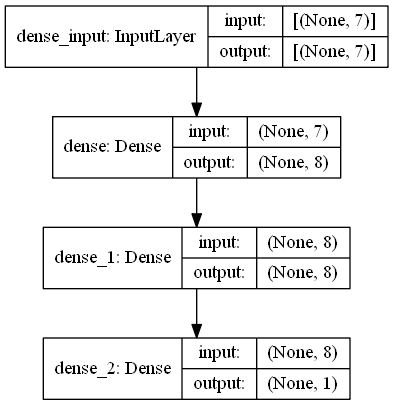

In [27]:
# 모델 시각화
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='model_plot.png', 
           show_shapes=True, 
           show_layer_names=True)


#### 4. 모델 컴파일

In [28]:
model.compile( loss = "mean_squared_error",
               optimizer = "adam", 
               metrics = ["mean_squared_error", "mean_absolute_error"])

### 5. 모델 훈련(callbacks)

In [29]:
# 라이브러리 및 로그 디렉토리 정의 join
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from datetime import datetime
import os

logdir = os.path.join("logs/fit/",datetime.now().strftime("%Y%m%d_%H%M%S"))

# 콜백 옵션 정의
callback_list =[
    EarlyStopping(monitor="val_loss", patience=500),
    TensorBoard(log_dir = logdir),
    ModelCheckpoint(filepath = "./check/model_r_weights.h5", 
                    verbose = 1, 
                    monitor = "val_loss", 
                    save_best_only = True) ]


In [30]:
# 훈련
model.fit( x=trainingData_features, 
              y=trainingData_label,
            batch_size=32,
            epochs=500,
            validation_split=0.2,
            callbacks = callback_list
           )

Epoch 1/500
3/3 [==============================] - 1s 99ms/step - loss: 5509664768.0000 - mean_squared_error: 5509664768.0000 - mean_absolute_error: 74221.2812 - val_loss: 5178992640.0000 - val_mean_squared_error: 5178992640.0000 - val_mean_absolute_error: 71961.3125

Epoch 00001: val_loss improved from inf to 5178992640.00000, saving model to ./check\model_r_weights.h5
Epoch 2/500
3/3 [==============================] - 0s 10ms/step - loss: 5086378496.0000 - mean_squared_error: 5086378496.0000 - mean_absolute_error: 71313.1250 - val_loss: 4873030144.0000 - val_mean_squared_error: 4873030144.0000 - val_mean_absolute_error: 69803.0859

Epoch 00002: val_loss improved from 5178992640.00000 to 4873030144.00000, saving model to ./check\model_r_weights.h5
Epoch 3/500
3/3 [==============================] - 0s 9ms/step - loss: 4799805952.0000 - mean_squared_error: 4799805952.0000 - mean_absolute_error: 69275.2500 - val_loss: 4605220352.0000 - val_mean_squared_error: 4605220352.0000 - val_mean_a

In [31]:
# 훈련결과 변수에 저장하면서 훈련
history = model.fit( x=trainingData_features, 
            y=trainingData_label,
            batch_size=32,
            epochs=500,
            validation_split=0.2,
            callbacks = callback_list
           )

Epoch 1/500
3/3 [==============================] - 0s 146ms/step - loss: 698962.5625 - mean_squared_error: 698962.5625 - mean_absolute_error: 625.4194 - val_loss: 578133.5625 - val_mean_squared_error: 578133.5625 - val_mean_absolute_error: 659.4048

Epoch 00001: val_loss did not improve from 560964.18750
Epoch 2/500
3/3 [==============================] - 0s 14ms/step - loss: 698950.6875 - mean_squared_error: 698950.6875 - mean_absolute_error: 625.4577 - val_loss: 578292.6250 - val_mean_squared_error: 578292.6250 - val_mean_absolute_error: 659.5051

Epoch 00002: val_loss did not improve from 560964.18750
Epoch 3/500
3/3 [==============================] - 0s 12ms/step - loss: 698984.1875 - mean_squared_error: 698984.1875 - mean_absolute_error: 625.4387 - val_loss: 577349.6250 - val_mean_squared_error: 577349.6250 - val_mean_absolute_error: 658.9041

Epoch 00003: val_loss did not improve from 560964.18750
Epoch 4/500
3/3 [==============================] - 0s 12ms/step - loss: 698515.0000 

In [32]:
# gpu 사용시에는!
# 모델 훈련 종료 후!!! 세션 및 gpu 메모리를 해제해야한다!

from tensorflow.keras import backend as K
K.clear_session()
from numba import cuda
cuda.select_device(0)
cuda.close()


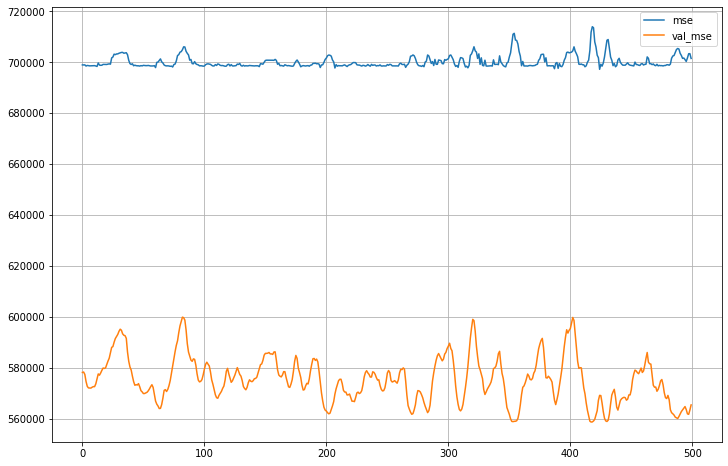

In [33]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
# 훈련 데이터의 mse
plt.plot(history.history['mean_squared_error'])
# 검증 데이터의 mse
plt.plot(history.history['val_mean_squared_error'])
plt.legend(['mse','val_mse'])
plt.grid()
plt.show()


#### 5-2. 학습기록 확인

In [34]:
# 훈련 결과 중 마지막 5개를 확인

hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mean_squared_error,mean_absolute_error,val_loss,val_mean_squared_error,val_mean_absolute_error,epoch
495,700328.2500,700328.2500,637.649048,563545.1875,563545.1875,647.128052,495
496,701703.8125,701703.8125,640.727600,561849.2500,561849.2500,644.766907,496
497,703357.3125,703357.3125,643.279297,561667.4375,561667.4375,644.480774,497
498,703382.5000,703382.5000,642.969238,563351.6875,563351.6875,646.881958,498
499,701512.0000,701512.0000,640.405579,565365.3750,565365.3750,649.239990,499
